In [1]:
from sanfis import SANFIS

--- 根据配置解析特征角色 ---

--- 最终特征列表 ---
解释变量 (X): ['Desulfurization_Liquid_Pressure', 'Gas_Inlet_Flow', 'Gas_Inlet_Temperature', 'H2S_Inlet_Concentration', 'Rotation_Speed']
状态变量 (S): ['Desulfurization_Liquid_Flow', 'Desulfurization_Liquid_Temperature', 'Gas_Inlet_Flow', 'Gas_Inlet_Pressure', 'Rotation_Speed']

--- 模型配置 ---
输入特征数 (解释变量X的数量): 5
每个输入的隶属函数数量 (M): 3


开始优化器比较实验

正在训练: Adam

训练配置: 优化器=Adam
Epoch [100/2000] - Train Loss: 0.259714, Valid Loss: 0.228804
Epoch [200/2000] - Train Loss: 0.141811, Valid Loss: 0.135230
Epoch [300/2000] - Train Loss: 0.019713, Valid Loss: 0.027288
Epoch [400/2000] - Train Loss: 0.007776, Valid Loss: 0.016268
Epoch [500/2000] - Train Loss: 0.006978, Valid Loss: 0.015431
Epoch [600/2000] - Train Loss: 0.006263, Valid Loss: 0.014643
Epoch [700/2000] - Train Loss: 0.005619, Valid Loss: 0.013928
Epoch [800/2000] - Train Loss: 0.005034, Valid Loss: 0.013308
Epoch [900/2000] - Train Loss: 0.004502, Valid Loss: 0.012738
Epoch [1000/2000] - Train Loss: 0.004026, 

C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:665: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:665: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:665: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:665: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:665: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:665: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-

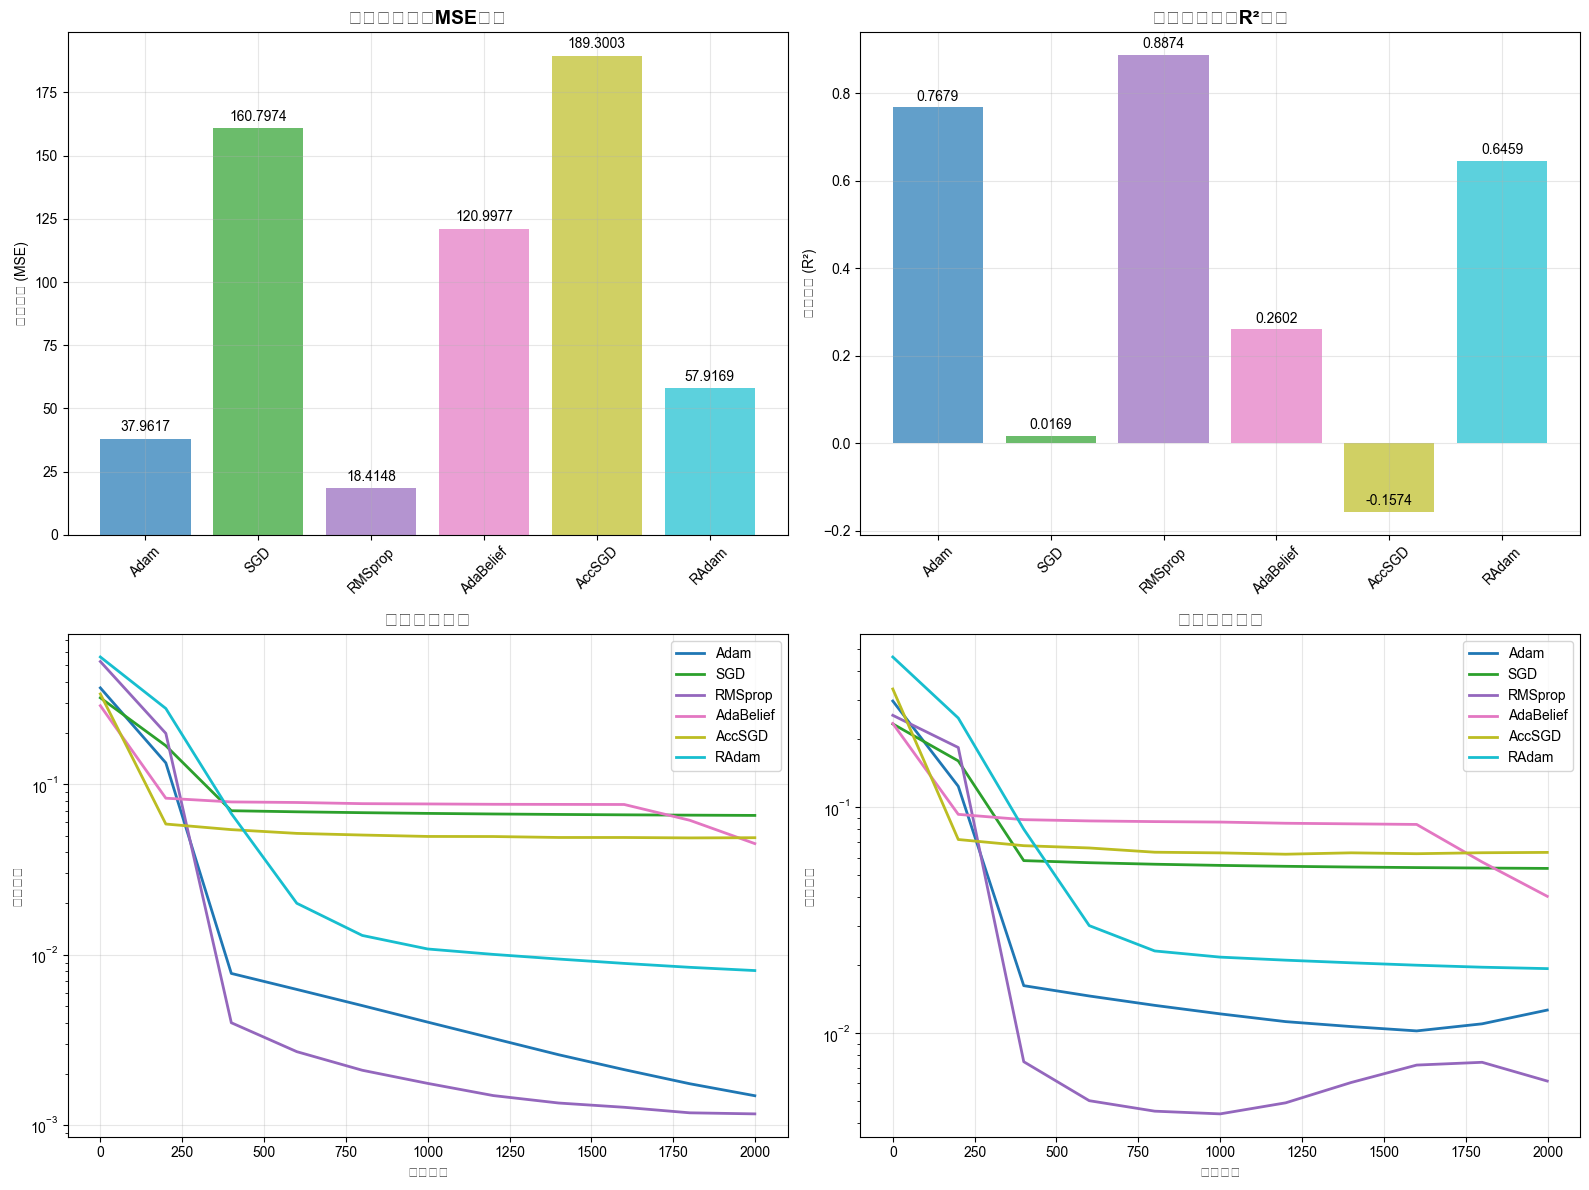

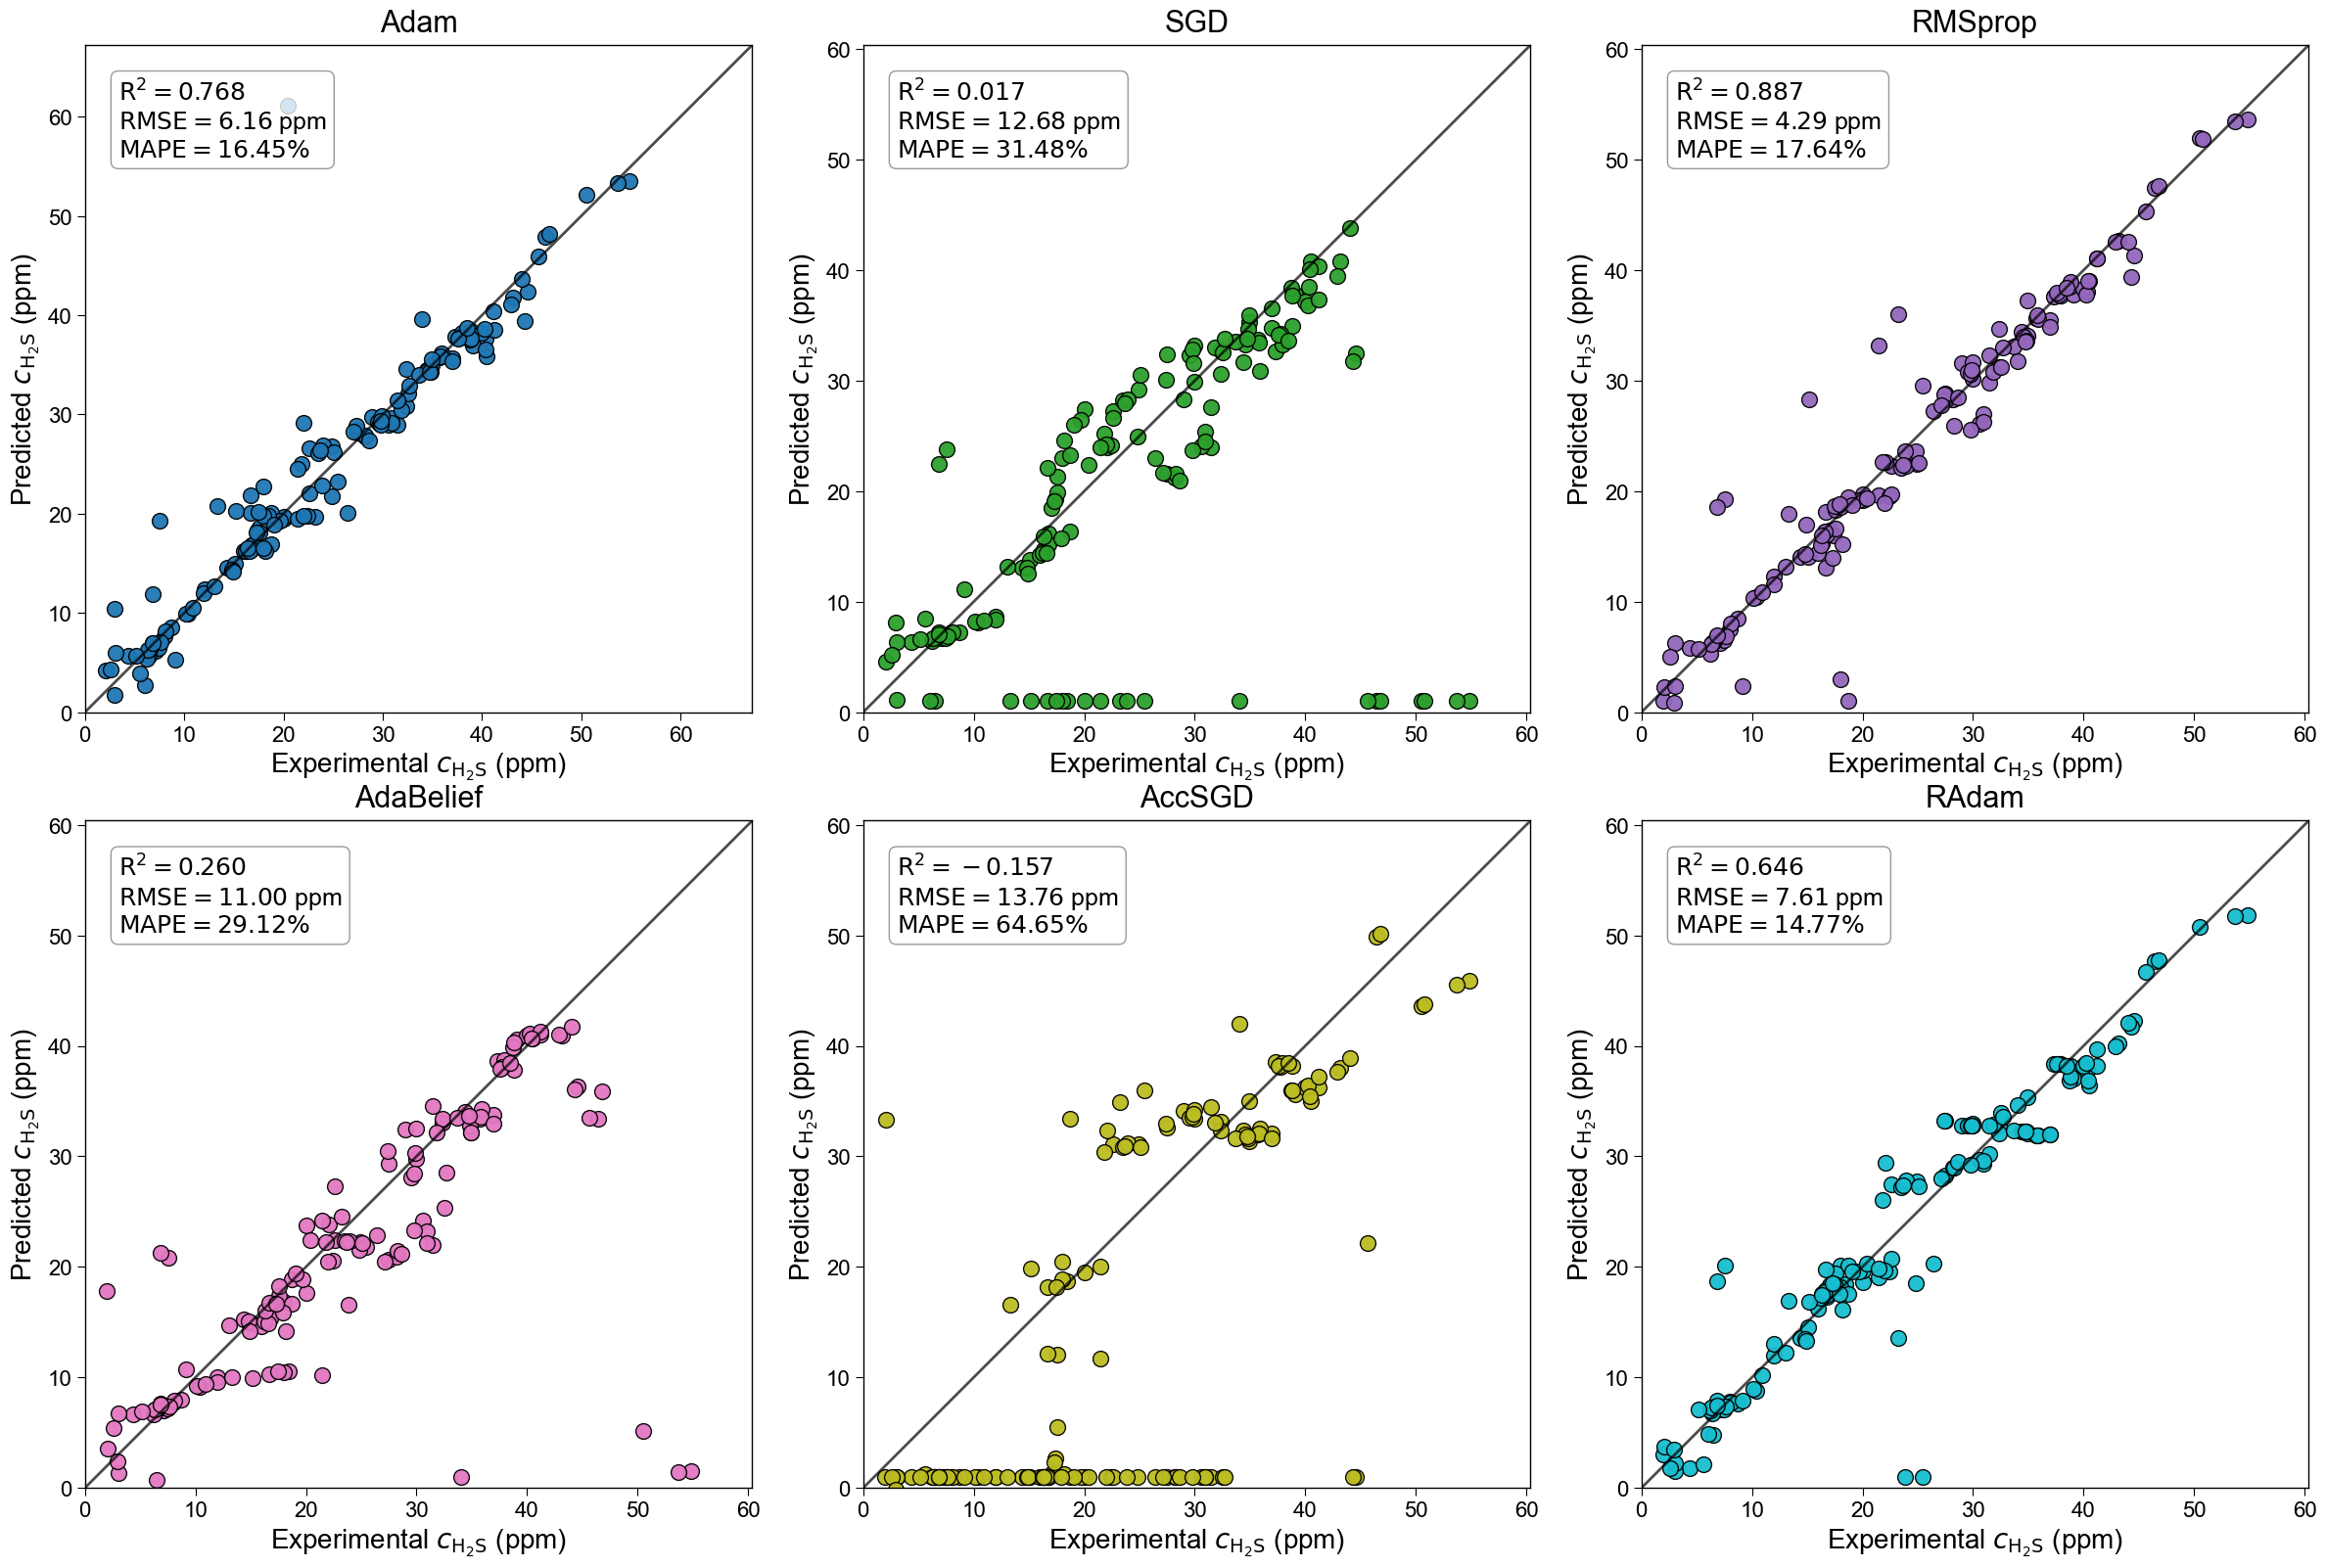


绘制最佳优化器 (RMSprop) 的隶属函数演化...


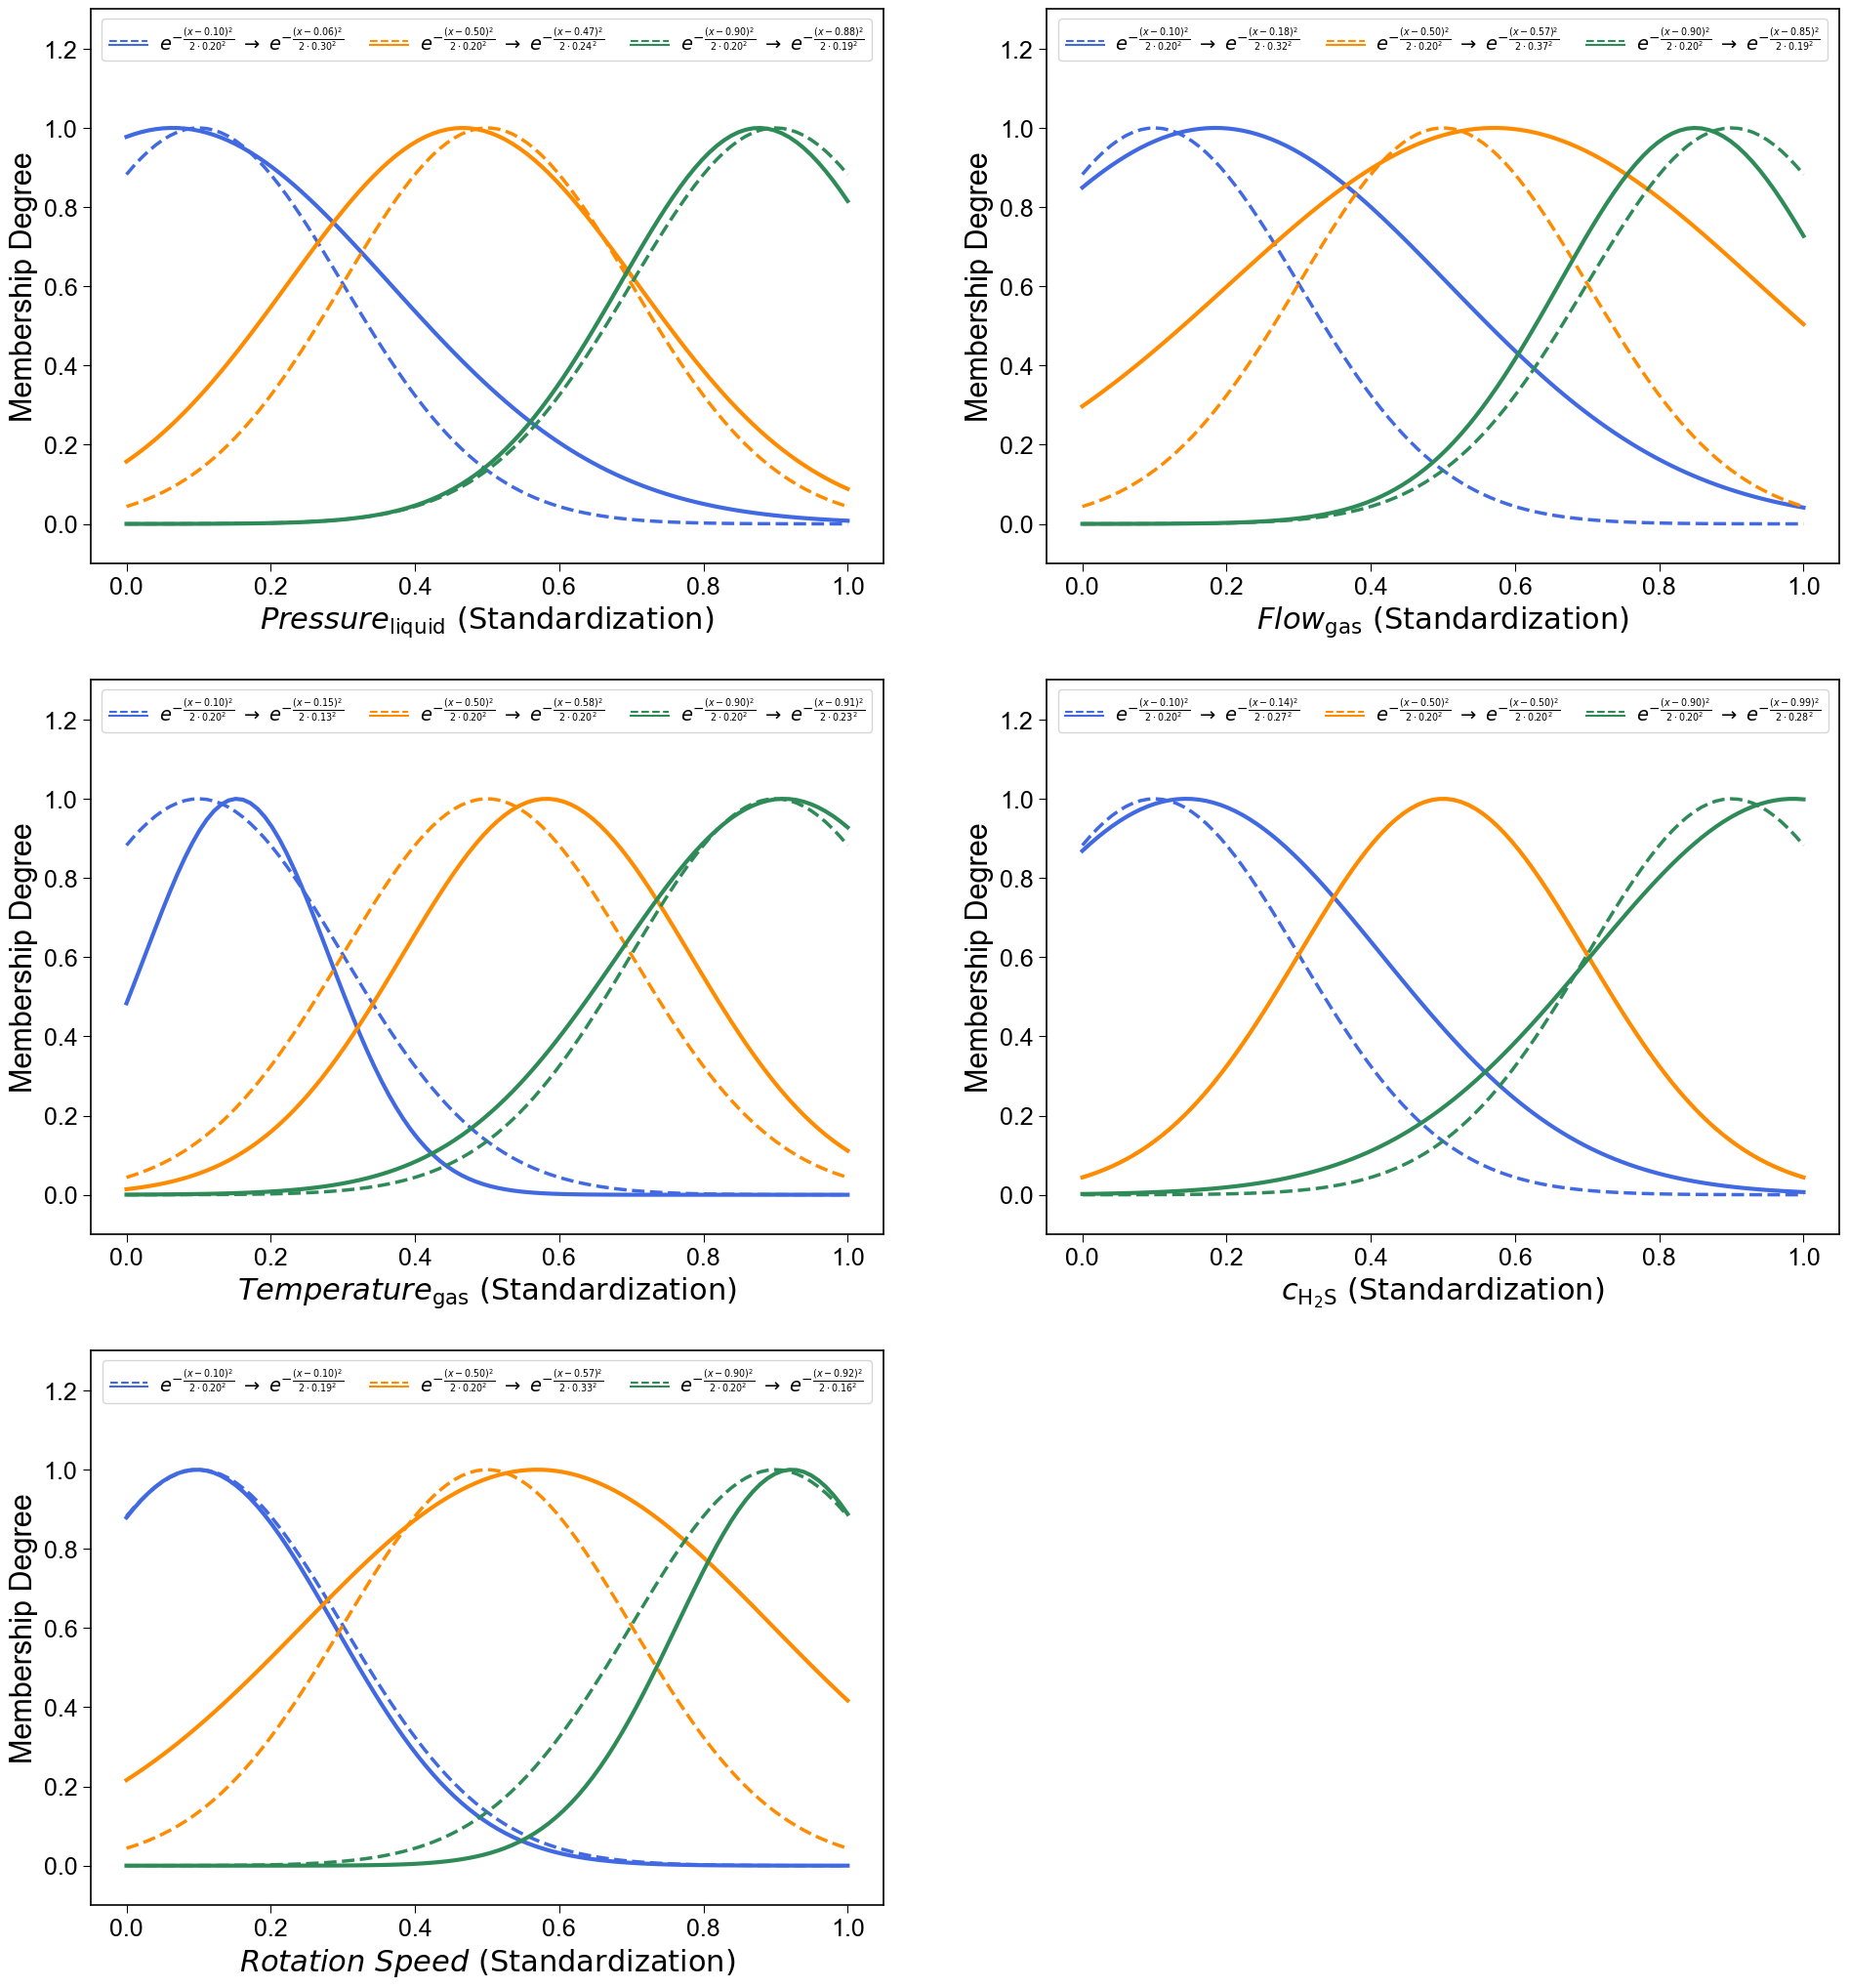

C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:963: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:963: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:963: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:963: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:963: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\11316\AppData\Local\Temp\ipykernel_22664\1818641093.py:963: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-

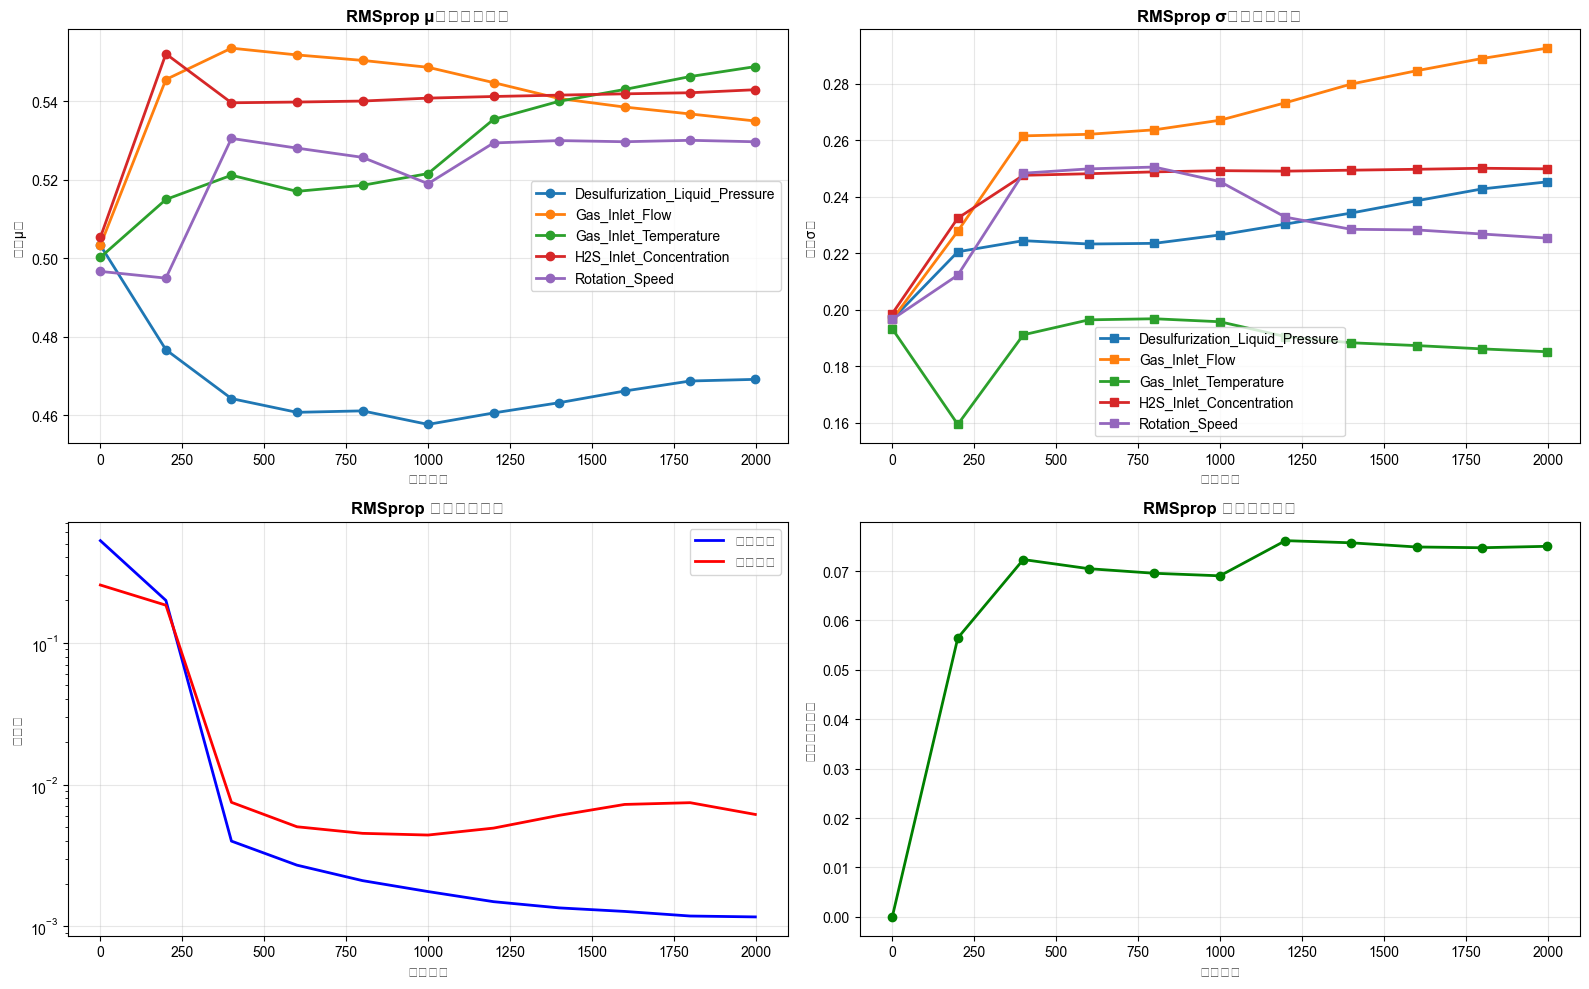


保存完整的TSK模糊规则...
完整TSK模糊规则已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_Adam_20250815_095002.json
可读格式已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_Adam_20250815_095002.txt
完整TSK模糊规则已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_SGD_20250815_095002.json
可读格式已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_SGD_20250815_095002.txt
完整TSK模糊规则已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_RMSprop_20250815_095002.json
可读格式已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_RMSprop_20250815_095002.txt
完整TSK模糊规则已保存: sanfis_process_optimization\optimizer_comparison_20250815_095002\complete_fuzzy_rules\complete_rules_AdaBelief_20250815_095002.json
可读格式已

In [2]:
import numpy as np
import pandas as pd
import torch
import torch_optimizer  # 需要安装: pip install torch-optimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sanfis import SANFIS
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import copy
import os
from datetime import datetime
import json
import pickle
from itertools import product

# ===== Matplotlib Configuration =====
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Helvetica World', 'Arial', 'Arial Unicode MS']
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['path.simplify'] = True
plt.rcParams['path.snap'] = True

# 创建保存目录
save_dir = 'sanfis_results'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# [数据加载和预处理代码保持不变...]
# 加载数据
file_path = './data/脱硫数据整理2.xlsx'
try:
    data_df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"错误：文件未找到，请检查路径：{file_path}")
    exit()

# ==============================================================================
# 1. 新增：引入您提供的参数配置
# ==============================================================================
best_params = {
    "role_GasInletFlow": "both",
    "role_GasInletTemperature": "explanatory",
    "role_GasInletPressure": "state",
    "role_DesulfurizationLiquidFlow": "state",
    "role_DesulfurizationLiquidTemperature": "state",
    "role_DesulfurizationLiquidPressure": "explanatory",
    "role_RotationSpeed": "both",
    "role_HtwoSInletConcentration": "explanatory",
    "M": 3
}


# 数据预处理部分
column_rename_dict = {
    '煤气进口流量': 'Gas_Inlet_Flow',
    '进口煤气温度': 'Gas_Inlet_Temperature',
    '进口煤气压力': 'Gas_Inlet_Pressure',
    '脱硫液流量': 'Desulfurization_Liquid_Flow',
    '脱硫液温度': 'Desulfurization_Liquid_Temperature',
    '脱硫液压力': 'Desulfurization_Liquid_Pressure',
    '转速': 'Rotation_Speed',
    '进口H2S浓度': 'H2S_Inlet_Concentration',
    '出口H2S浓度': 'H2S_Outlet_Concentration'
}

data_df.rename(columns=column_rename_dict, inplace=True)

# ==============================================================================
# 2. 修改：根据 best_params 动态生成特征列表
# ==============================================================================
# 映射配置键到DataFrame列名 (因为字典键不能有下划线，但列名有)
config_to_df_col_map = {
    'GasInletFlow': 'Gas_Inlet_Flow',
    'GasInletTemperature': 'Gas_Inlet_Temperature',
    'GasInletPressure': 'Gas_Inlet_Pressure',
    'DesulfurizationLiquidFlow': 'Desulfurization_Liquid_Flow',
    'DesulfurizationLiquidTemperature': 'Desulfurization_Liquid_Temperature',
    'DesulfurizationLiquidPressure': 'Desulfurization_Liquid_Pressure',
    'RotationSpeed': 'Rotation_Speed',
    'HtwoSInletConcentration': 'H2S_Inlet_Concentration'
}

s_features = []  # 状态变量 S
x_features = []  # 解释变量 X

print("--- 根据配置解析特征角色 ---")
for key, role in best_params.items():
    if key.startswith("role_"):
        config_key = key.replace("role_", "")
        df_col = config_to_df_col_map.get(config_key)
        if df_col:
            if role == 'state':
                s_features.append(df_col)
            elif role == 'explanatory':
                x_features.append(df_col)
            elif role == 'both':
                s_features.append(df_col)
                x_features.append(df_col)

# 去重并排序，确保列表唯一且顺序固定
s_features = sorted(list(set(s_features)))
x_features = sorted(list(set(x_features)))

# 获取所有需要用到的特征列
all_model_features = sorted(list(set(s_features + x_features)))
output_feature = 'H2S_Outlet_Concentration'

print("\n--- 最终特征列表 ---")
print(f"解释变量 (X): {x_features}")
print(f"状态变量 (S): {s_features}")


# 数据清理和标准化
# ==============================================================================
# 3. 修改：使用新的特征列表进行数据清理和标准化
# ==============================================================================
data_clean = data_df[all_model_features + [output_feature]].dropna()

# 根据新的特征列表准备 S, X, y 数据
S_raw = data_clean[s_features].values
X_raw = data_clean[x_features].values
y_raw = data_clean[output_feature].values.reshape(-1, 1)

# 为 S, X, y 分别创建和拟合缩放器
scaler_S = MinMaxScaler()
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

S_scaled = scaler_S.fit_transform(S_raw)
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw)

# 同时对 S, X, y进行训练集和测试集划分，确保数据对齐
X_train_np, X_test_np, S_train_np, S_test_np, y_train_np, y_test_np = train_test_split(
    X_scaled, S_scaled, y_scaled, test_size=0.2, random_state=42
)

# 转换为PyTorch Tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32)
S_train_tensor = torch.tensor(S_train_np, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32)
S_test_tensor = torch.tensor(S_test_np, dtype=torch.float32)

train_data = [S_train_tensor, X_train_tensor, y_train_tensor]
valid_data = [S_test_tensor, X_test_tensor, y_test_tensor]

# ==============================================================================
# 4. 修改：使用 best_params 中的 M 配置模型
# ==============================================================================
# n_input_features 现在是解释变量X的数量
n_input_features = len(x_features)
# n_memb_funcs_per_input 来自配置
n_memb_funcs_per_input = best_params['M']

print("\n--- 模型配置 ---")
print(f"输入特征数 (解释变量X的数量): {n_input_features}")
print(f"每个输入的隶属函数数量 (M): {n_memb_funcs_per_input}\n")


membfuncs_config = []
for i in range(n_input_features):
    mu_values = np.linspace(0.1, 0.9, n_memb_funcs_per_input).tolist()
    sigma_values = [0.2] * n_memb_funcs_per_input

    membfuncs_config.append({
        'function': 'gaussian',
        'n_memb': n_memb_funcs_per_input,
        'params': {
            'mu': {'value': mu_values, 'trainable': True},
            'sigma': {'value': sigma_values, 'trainable': True}
        }
    })

# 定义优化器配置
optimizer_configs = {
    'Adam': {'class': torch.optim.Adam, 'params': {'lr': 0.001}},
    'SGD': {'class': torch.optim.SGD, 'params': {'lr': 0.01, 'momentum': 0.9}},
    'RMSprop': {'class': torch.optim.RMSprop, 'params': {'lr': 0.001}},
    'AdaBelief': {'class': torch_optimizer.AdaBelief, 'params': {'lr': 0.001}},
    'AccSGD': {'class': torch_optimizer.AccSGD, 'params': {'lr': 0.01}},
    'AdaBound': {'class': torch_optimizer.AdaBound, 'params': {'lr': 0.001}},
    'RAdam': {'class': torch_optimizer.RAdam, 'params': {'lr': 0.001}},
}


# 完整的TSK模糊规则提取函数
def debug_model_parameters(model):
    """详细分析模型参数结构"""
    print(f"\n{'=' * 80}")
    print(f"SANFIS模型参数详细分析")
    print(f"{'=' * 80}")

    print("所有模型参数:")
    for name, param in model.named_parameters():
        print(f"  {name}: {param.shape} | requires_grad: {param.requires_grad}")
        if param.numel() < 50:  # 如果参数不太多，显示具体数值
            print(f"    数值: {param.detach().cpu().numpy().flatten()}")
        print()


def extract_complete_fuzzy_rules_v2(model, input_features):
    """改进版：基于实际参数结构提取TSK模糊规则"""
    print(f"\n{'=' * 80}")
    print(f"SANFIS TSK型模糊规则提取 (改进版)")
    print(f"{'=' * 80}")

    n_inputs = len(input_features)
    n_mf = n_memb_funcs_per_input

    # 生成所有规则组合
    rule_combinations = list(product(range(n_mf), repeat=n_inputs))
    total_rules = len(rule_combinations)

    print(f"输入变量数量: {n_inputs}")
    print(f"每个输入的隶属函数数量: {n_mf}")
    print(f"总规则数量: {total_rules}")

    # 收集所有参数
    all_params = {}
    for name, param in model.named_parameters():
        all_params[name] = param.detach().cpu().numpy()

    print(f"\n找到的所有参数:")
    for name, param in all_params.items():
        print(f"  {name}: shape {param.shape}")

    # 更灵活的参数分类
    mu_params = []
    sigma_params = []
    potential_consequent_params = []

    for name, param in all_params.items():
        param_lower = name.lower()

        # 隶属函数中心参数
        if any(keyword in param_lower for keyword in ['mu', 'mean', 'center', 'centre']):
            mu_params.append((name, param))
        # 隶属函数宽度参数
        elif any(keyword in param_lower for keyword in ['sigma', 'std', 'width', 'scale']):
            sigma_params.append((name, param))
        # 可能的后件参数
        elif any(keyword in param_lower for keyword in ['weight', 'linear', 'consequent', 'coeff', 'output']):
            potential_consequent_params.append((name, param))
        # 如果参数维度看起来像后件参数
        elif param.ndim >= 2 and (param.shape[0] == total_rules or param.shape[1] == n_inputs + 1):
            potential_consequent_params.append((name, param))

    print(f"\n参数分类结果:")
    print(f"  隶属函数中心(mu): {len(mu_params)} 组")
    print(f"  隶属函数宽度(sigma): {len(sigma_params)} 组")
    print(f"  可能的后件参数: {len(potential_consequent_params)} 组")

    for name, param in potential_consequent_params:
        print(f"    {name}: {param.shape}")

    # 尝试从模型的forward方法或特定属性获取后件参数
    consequent_weights = None

    # 方法1: 检查是否有直接的后件参数属性
    if hasattr(model, 'consequent_params'):
        consequent_weights = model.consequent_params.detach().cpu().numpy()
        print(f"  方法1成功: 找到consequent_params {consequent_weights.shape}")
    elif hasattr(model, 'linear_params'):
        consequent_weights = model.linear_params.detach().cpu().numpy()
        print(f"  方法1成功: 找到linear_params {consequent_weights.shape}")
    elif hasattr(model, 'output_weights'):
        consequent_weights = model.output_weights.detach().cpu().numpy()
        print(f"  方法1成功: 找到output_weights {consequent_weights.shape}")

    # 方法2: 从potential_consequent_params中选择最合适的
    if consequent_weights is None and len(potential_consequent_params) > 0:
        for name, param in potential_consequent_params:
            # 检查参数形状是否合理
            if param.ndim == 2:
                if param.shape[0] == total_rules and param.shape[1] >= n_inputs:
                    consequent_weights = param
                    print(f"  方法2成功: 使用 {name} {param.shape}")
                    break
                elif param.shape[1] == total_rules and param.shape[0] >= n_inputs:
                    consequent_weights = param.T  # 转置
                    print(f"  方法2成功: 使用转置的 {name} {param.shape}")
                    break

    # 方法3: 如果还没找到，尝试通过模型推理来估计
    if consequent_weights is None:
        print("  方法3: 尝试通过模型推理估计后件参数...")
        consequent_weights = estimate_consequent_params(model, input_features, rule_combinations)

    # 定义隶属函数标签
    mf_labels = ['低', '中', '高']

    # 计算规则激活强度
    model.eval()
    rule_data = []

    with torch.no_grad():
        sample_size = min(20, len(X_test_tensor))
        X_sample = X_test_tensor[:sample_size]
        S_sample = S_test_tensor[:sample_size]

        for rule_idx, rule_combo in enumerate(rule_combinations):
            # 计算前件激活强度
            total_activation = 0

            for sample_idx in range(len(X_sample)):
                rule_activation = 1.0

                for input_idx, mf_idx in enumerate(rule_combo):
                    x_val = X_sample[sample_idx, input_idx].item()

                    # 使用提取的隶属函数参数
                    if input_idx < len(mu_params) and input_idx < len(sigma_params):
                        _, mu_vals = mu_params[input_idx]
                        _, sigma_vals = sigma_params[input_idx]

                        mu_vals = mu_vals.flatten()
                        sigma_vals = sigma_vals.flatten()

                        if mf_idx < len(mu_vals) and mf_idx < len(sigma_vals):
                            mu = mu_vals[mf_idx]
                            sigma = sigma_vals[mf_idx]
                            membership = np.exp(-0.5 * ((x_val - mu) / (sigma + 1e-8)) ** 2)
                            rule_activation *= membership

                total_activation += rule_activation

            avg_activation = total_activation / len(X_sample)

            # 提取该规则的后件参数
            rule_weights = None
            if consequent_weights is not None:
                try:
                    if consequent_weights.ndim == 2:
                        if rule_idx < consequent_weights.shape[0]:
                            rule_weights = consequent_weights[rule_idx]
                    elif consequent_weights.ndim == 1:
                        # 假设所有规则共享相同的权重结构
                        params_per_rule = n_inputs + 1
                        start_idx = rule_idx * params_per_rule
                        end_idx = start_idx + params_per_rule
                        if end_idx <= len(consequent_weights):
                            rule_weights = consequent_weights[start_idx:end_idx]
                except Exception as e:
                    print(f"提取规则{rule_idx}参数时出错: {e}")

            # 构建前件条件
            conditions = []
            membership_params = {}
            for j, mf_idx in enumerate(rule_combo):
                feature_name = input_features[j]
                mf_label = mf_labels[mf_idx]
                conditions.append(f"{feature_name}={mf_label}")

                # 保存隶属函数参数
                if j < len(mu_params) and j < len(sigma_params):
                    _, mu_vals = mu_params[j]
                    _, sigma_vals = sigma_params[j]
                    mu_vals = mu_vals.flatten()
                    sigma_vals = sigma_vals.flatten()

                    if mf_idx < len(mu_vals) and mf_idx < len(sigma_vals):
                        membership_params[feature_name] = {
                            'mu': float(mu_vals[mf_idx]),
                            'sigma': float(sigma_vals[mf_idx]),
                            'label': mf_label
                        }

            condition_str = " AND ".join(conditions)

            # 构建后件线性函数
            consequent_str = ""
            consequent_params = {}
            if rule_weights is not None and len(rule_weights) >= n_inputs:
                if rule_weights.ndim > 1:
                    rule_weights = rule_weights.flatten()

                # 检查是否包含偏置项
                if len(rule_weights) == n_inputs + 1:
                    # 包含偏置项
                    consequent_params['bias'] = float(rule_weights[0])
                    consequent_str = f"{rule_weights[0]:.4f}"

                    for j in range(n_inputs):
                        w = rule_weights[j + 1]
                        consequent_params[f'weight_{input_features[j]}'] = float(w)
                        sign = "+" if w >= 0 else ""
                        consequent_str += f" {sign}{w:.4f}×{input_features[j]}"
                else:
                    # 不包含偏置项
                    for j in range(min(n_inputs, len(rule_weights))):
                        w = rule_weights[j]
                        consequent_params[f'weight_{input_features[j]}'] = float(w)
                        if j == 0:
                            consequent_str = f"{w:.4f}×{input_features[j]}"
                        else:
                            sign = "+" if w >= 0 else ""
                            consequent_str += f" {sign}{w:.4f}×{input_features[j]}"

            rule_data.append({
                'rule_id': rule_idx + 1,
                'combo': rule_combo,
                'activation': avg_activation,
                'condition': condition_str,
                'membership_params': membership_params,
                'consequent_params': consequent_params,
                'consequent_equation': consequent_str,
                'weights': rule_weights.tolist() if rule_weights is not None else None
            })

    # 按激活强度排序
    rule_data.sort(key=lambda x: x['activation'], reverse=True)

    # 输出规则
    print(f"\n{'=' * 80}")
    print(f"前15个最活跃的完整TSK模糊规则:")
    print(f"{'=' * 80}")

    valid_rules_count = 0
    for i, rule_info in enumerate(rule_data[:15]):
        if rule_info['consequent_equation']:
            valid_rules_count += 1
            print(f"\n规则 {rule_info['rule_id']} (激活强度: {rule_info['activation']:.4f}):")
            print(f"IF ({rule_info['condition']})")
            print(f"THEN y = {rule_info['consequent_equation']}")

            # 显示详细参数
            print(f"  隶属函数参数:")
            for feature, params in rule_info['membership_params'].items():
                print(f"    {feature}: μ={params['mu']:.4f}, σ={params['sigma']:.4f}")

            print(f"  后件参数:")
            for param_name, value in rule_info['consequent_params'].items():
                print(f"    {param_name}: {value:.4f}")

    print(f"\n总结: 成功提取 {valid_rules_count}/15 个规则的完整参数")

    return rule_data


def estimate_consequent_params(model, input_features, rule_combinations):
    """通过数值方法估计后件参数"""
    print("  尝试通过数值方法估计后件参数...")
    return None


def extract_membership_params_alternative(model, membfuncs_config):
    """备用方法：从配置和模型状态提取参数"""
    params = {
        'mu_params': [],
        'sigma_params': []
    }

    # 如果直接提取失败，使用模型的state_dict
    state_dict = model.state_dict()

    for i in range(len(membfuncs_config)):
        mu_list = []
        sigma_list = []

        # 查找相关参数
        for key, value in state_dict.items():
            if f'{i}' in key or 'membfunc' in key:
                if 'mu' in key or 'mean' in key:
                    if isinstance(value, torch.Tensor):
                        mu_list.extend(value.detach().cpu().numpy().flatten())
                elif 'sigma' in key or 'std' in key:
                    if isinstance(value, torch.Tensor):
                        sigma_list.extend(value.detach().cpu().numpy().flatten())

        # 如果仍然为空，使用初始配置
        if not mu_list:
            mu_list = membfuncs_config[i]['params']['mu']['value']
        if not sigma_list:
            sigma_list = membfuncs_config[i]['params']['sigma']['value']

        params['mu_params'].append(np.array(mu_list))
        params['sigma_params'].append(np.array(sigma_list))

    return params


def train_model(optimizer_name, epochs=1000):
    """训练单个模型"""
    print(f"\n{'=' * 60}")
    print(f"训练配置: 优化器={optimizer_name}")
    print(f"{'=' * 60}")

    # 初始化模型
    model = SANFIS(
        membfuncs=membfuncs_config,
        n_input=n_input_features,
        to_device='cpu',
        scale='Std'
    )

    # 保存训练前的参数
    initial_params = extract_membership_params_alternative(model, membfuncs_config)

    # 训练历史记录
    training_history = {
        'epochs': [],
        'mu_params': [],
        'sigma_params': [],
        'train_losses': [],
        'valid_losses': []
    }

    # 设置优化器
    optimizer_config = optimizer_configs[optimizer_name]
    try:
        optimizer = optimizer_config['class'](model.parameters(), **optimizer_config['params'])
    except Exception as e:
        print(f"创建优化器 {optimizer_name} 时出错: {e}")
        return None

    loss_function = torch.nn.MSELoss(reduction='mean')

    print_interval = 100
    save_interval = 200

    model.train()
    for epoch in range(epochs):
        # 训练步骤
        optimizer.zero_grad()
        train_pred = model(train_data[0], train_data[1])
        train_loss = loss_function(train_pred, train_data[2])
        train_loss.backward()

        # 梯度裁剪
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # 验证步骤
        model.eval()
        with torch.no_grad():
            valid_pred = model(valid_data[0], valid_data[1])
            valid_loss = loss_function(valid_pred, valid_data[2])
        model.train()

        # 保存训练历史
        if epoch % save_interval == 0 or epoch == epochs - 1:
            current_params = extract_membership_params_alternative(model, membfuncs_config)
            training_history['epochs'].append(epoch)
            training_history['mu_params'].append(copy.deepcopy(current_params['mu_params']))
            training_history['sigma_params'].append(copy.deepcopy(current_params['sigma_params']))
            training_history['train_losses'].append(train_loss.item())
            training_history['valid_losses'].append(valid_loss.item())

        # 打印进度
        if (epoch + 1) % print_interval == 0:
            print(f"Epoch [{epoch + 1}/{epochs}] - "
                  f"Train Loss: {train_loss.item():.6f}, "
                  f"Valid Loss: {valid_loss.item():.6f}")

    # 最终评估
    model.eval()
    with torch.no_grad():
        y_pred_scaled_tensor = model(S_test_tensor, X_test_tensor)

    y_pred_scaled = y_pred_scaled_tensor.detach().numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_original = scaler_y.inverse_transform(y_test_np)

    mse = mean_squared_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)

    final_params = extract_membership_params_alternative(model, membfuncs_config)

    # 提取完整的TSK模糊规则
    print(f"\n开始提取完整的TSK模糊规则...")
    debug_model_parameters(model)
    fuzzy_rules = extract_complete_fuzzy_rules_v2(model, x_features)

    result = {
        'optimizer_name': optimizer_name,
        'mse': mse,
        'r2': r2,
        'initial_params': initial_params,
        'final_params': final_params,
        'training_history': training_history,
        'y_pred': y_pred,
        'y_test_original': y_test_original,
        'fuzzy_rules': fuzzy_rules,
        'model_state_dict': model.state_dict(),
        'trained_model': model  # 保存训练好的模型
    }

    print(f"最终结果: MSE={mse:.4f}, R²={r2:.4f}")

    return result


def plot_comparison_results(results_list, save_dir):
    """绘制比较结果"""
    if not results_list:
        return

    # 1. 性能比较图
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # MSE比较
    optimizers = [r['optimizer_name'] for r in results_list]
    mse_values = [r['mse'] for r in results_list]
    r2_values = [r['r2'] for r in results_list]

    colors = plt.cm.tab10(np.linspace(0, 1, len(results_list)))

    bars1 = ax1.bar(optimizers, mse_values, color=colors, alpha=0.7)
    ax1.set_title('不同优化器的MSE比较', fontweight='bold', fontsize=14)
    ax1.set_ylabel('均方误差 (MSE)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)

    # 在柱状图上添加数值标签
    for bar, mse in zip(bars1, mse_values):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(mse_values) * 0.01,
                 f'{mse:.4f}', ha='center', va='bottom', fontsize=10)

    # R²比较
    bars2 = ax2.bar(optimizers, r2_values, color=colors, alpha=0.7)
    ax2.set_title('不同优化器的R²比较', fontweight='bold', fontsize=14)
    ax2.set_ylabel('决定系数 (R²)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

    for bar, r2 in zip(bars2, r2_values):
        ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(r2_values) * 0.01,
                 f'{r2:.4f}', ha='center', va='bottom', fontsize=10)

    # 训练损失对比
    for i, result in enumerate(results_list):
        history = result['training_history']
        ax3.plot(history['epochs'], history['train_losses'],
                 label=f"{result['optimizer_name']}",
                 color=colors[i], linewidth=2)

    ax3.set_title('训练损失对比', fontweight='bold', fontsize=14)
    ax3.set_xlabel('训练轮次')
    ax3.set_ylabel('训练损失')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')

    # 验证损失对比
    for i, result in enumerate(results_list):
        history = result['training_history']
        ax4.plot(history['epochs'], history['valid_losses'],
                 label=f"{result['optimizer_name']}",
                 color=colors[i], linewidth=2)

    ax4.set_title('验证损失对比', fontweight='bold', fontsize=14)
    ax4.set_xlabel('训练轮次')
    ax4.set_ylabel('验证损失')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_yscale('log')

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'optimizer_comparison_{timestamp}.png'),
                dpi=300, bbox_inches='tight')
    plt.show()

    # 2. 预测结果对比
    from sklearn.metrics import r2_score, mean_squared_error

    n_optimizers = len(results_list)
    n_cols = min(3, n_optimizers)
    n_rows = (n_optimizers + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 8 * n_rows))
    if n_optimizers == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)

    for i, result in enumerate(results_list):
        row = i // n_cols
        col = i % n_cols
        
        if n_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        
        y_test = result['y_test_original']
        y_pred = result['y_pred']
        
        # 计算R²和RMSE
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        # 计算相对误差和误差边界
        relative_error = (y_pred - y_test) / y_test * 100  # 相对误差百分比
        mean_error = np.mean(relative_error)
        std_error = np.std(relative_error)
        
        # 绘制散点图
        ax.scatter(y_test, y_pred, alpha=0.95, color=colors[i], s=130, edgecolor='black')
        
        # 设置轴范围（从0开始）
        max_val = max(y_test.max(), y_pred.max())
        margin = max_val * 0.1  # 10%的上边距
        ax.set_xlim(0, max_val + margin)
        ax.set_ylim(0, max_val + margin)
        
        # 添加对角线（理想预测线）
        x_line = np.array([0, max_val + margin])
        ax.plot(x_line, x_line, 'k-', linewidth=2, alpha=0.7, label='Ideal prediction')
        
        
        # 添加R²和RMSE信息
        textstr = (rf'$\mathrm{{R}}^2 = {r2:.3f}$' + '\n' + 
                rf'$\mathrm{{RMSE}} = {rmse:.2f}$ ppm' + '\n' +
                rf'$\mathrm{{MAPE}} = {mape:.2f}\%$')
        props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=18,
                verticalalignment='top', bbox=props)
        
        # 设置标签和样式
        ax.set_xlabel(r'Experimental $c_{\mathrm{H}_2\mathrm{S}}$ (ppm)', fontsize=20)
        ax.set_ylabel(r'Predicted $c_{\mathrm{H}_2\mathrm{S}}$ (ppm)', fontsize=20)
        ax.set_aspect('equal', adjustable='box')
        ax.tick_params(axis='both', which='major', direction='out', length=6, 
                    color='black', labelsize=16, bottom=True, top=False, 
                    left=True, right=False)
        ax.grid(False)
        
        # 设置子图标题（显示优化器名称）
        ax.set_title(f'{result["optimizer_name"]}', fontsize=22, pad=10)
        
        # 设置边框
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1.0)

    # 隐藏多余的子图
    for i in range(n_optimizers, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        if n_rows == 1:
            axes[col].set_visible(False)
        else:
            axes[row, col].set_visible(False)

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'prediction_comparison_{timestamp}.png'), 
                dpi=600, bbox_inches='tight')
    plt.savefig(os.path.join(save_dir, f'prediction_comparison_{timestamp}.pdf'), 
                bbox_inches='tight')
    plt.show()

# 自定义图例处理器类
from matplotlib.legend_handler import HandlerBase
from matplotlib.lines import Line2D
class HandlerDashedSolidLine(HandlerBase):
    """
    自定义图例处理器，用于创建上虚下实的双线图例符号。
    """
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):
        # 上方的虚线 (代表训练前)
        line1 = Line2D([0, width], [height*0.66, height*0.66], # y位置偏上
                       linestyle='--', color=orig_handle.get_color())
        # 下方的实线 (代表训练后)
        line2 = Line2D([0, width], [height*0.33, height*0.33], # y位置偏下
                       linestyle='-', color=orig_handle.get_color())
        
        return [line1, line2]

def plot_best_membership_evolution(best_result, save_dir):
    """绘制最佳优化器的隶属函数演化（优化版）"""
    print(f"\n绘制最佳优化器 ({best_result['optimizer_name']}) 的隶属函数演化...")

    initial_params = best_result['initial_params']
    final_params = best_result['final_params']
    training_history = best_result['training_history']
    optimizer_name = best_result['optimizer_name']

    n_inputs = len(x_features)
    n_points = 100
    x_range = np.linspace(0, 1, n_points)

    # 1. 训练前后对比图
    n_rows = 3
    n_cols = 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 7 * n_rows))
    axes = axes.ravel()
    
    # 优化点：使用更具描述性的特征名称和y轴标签
    letters = ['$Pressure_{\mathrm{liquid}}\ (\mathrm{Standardization})$', '$Flow_{\mathrm{gas}}\ (\mathrm{Standardization})$', '$Temperature_{\mathrm{gas}}\ (\mathrm{Standardization})$', '$c_{\mathrm{H}_2\mathrm{S}}\ (\mathrm{Standardization})$', '$Rotation\ Speed\ (\mathrm{Standardization})$']
    y_label = 'Membership Degree' # 或者 '隶属度'

    # 优化点：定义您希望使用的颜色
    colors = ['royalblue', 'darkorange', 'seagreen']
    
    # 假设隶属度函数有语义名称，如“低”、“中”、“高”
    mf_names = ['Low', 'Medium', 'High'] 

    for i in range(n_inputs):
        ax = axes[i]

        mu_init = initial_params['mu_params'][i]
        sigma_init = initial_params['sigma_params'][i]
        mu_final = final_params['mu_params'][i]
        sigma_final = final_params['sigma_params'][i]
        
        n_funcs = min(len(mu_init), len(sigma_init))

        # 优化点：为自定义图例准备句柄和标签
        legend_handles = []
        legend_labels = []

        for j in range(n_funcs):
            # 优化点：为每个隶属度函数分配一个固定颜色
            color = colors[j % len(colors)] # 使用模运算循环使用颜色

            # 训练前的隶属函数 (虚线)
            membership_init = np.exp(-0.5 * ((x_range - mu_init[j]) / (sigma_init[j] + 1e-8)) ** 2)
            # 移除 label, 因为我们将创建自定义图例
            ax.plot(x_range, membership_init, '--', color=color, linewidth=2.5, alpha=1)

            # 训练后的隶属函数 (实线)
            membership_final = np.exp(-0.5 * ((x_range - mu_final[j]) / (sigma_final[j] + 1e-8)) ** 2)
            ax.plot(x_range, membership_final, '-', color=color, linewidth=3, alpha=1)
            
            # 优化点：创建图例的代理艺术家和标签
            # 1. 创建一个代理线条，它的颜色与当前MF一致
            proxy_artist = plt.Line2D([0], [0], color=color)
            legend_handles.append(proxy_artist)
            
            # 2. 创建详细的标签文本
            #    使用您设想的格式，但用实际参数值代替通用公式
            var_symbol = 'x' # 在公式中使用通用符号 'x'，保持简洁
            # 训练前的公式
            init_formula = rf"e^{{-\frac{{({var_symbol} - {mu_init[j]:.2f})^2}}{{2 \cdot {sigma_init[j]:.2f}^2}}}}"
            # 训练后的公式
            final_formula = rf"e^{{-\frac{{({var_symbol} - {mu_final[j]:.2f})^2}}{{2 \cdot {sigma_final[j]:.2f}^2}}}}"
            
            # 组合成最终标签
            mf_name = mf_names[j] if j < len(mf_names) else f'MF {j+1}'
            label_text = (
                f"${init_formula}$"
                r" $\rightarrow$ "
                f"${final_formula}$"
            )
            legend_labels.append(label_text)

        ax.set_xlabel(rf'{letters[i]}', fontsize=22)
        ax.set_ylabel(y_label, fontsize=22)
        ax.grid(False)
        ax.set_ylim(-0.1, 1.3)
        ax.tick_params(axis='both', which='major', direction='out', length=6, color='black', labelsize=18)
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1.2)
            
        # 优化点：使用自定义句柄、标签和处理器生成图例
        ax.legend(handles=legend_handles, labels=legend_labels, handler_map={plt.Line2D: HandlerDashedSolidLine()},fontsize=14,ncol=len(legend_labels), loc='upper center', columnspacing=1.4, handletextpad=0.6)

    for i in range(n_inputs, n_rows * n_cols):
        axes[i].set_visible(False)

    plt.tight_layout(pad=3.0)
    # 确保保存目录存在
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'membership_evolution_{optimizer_name}_{timestamp}.png'), dpi=600, bbox_inches='tight')
    plt.savefig(os.path.join(save_dir, f'membership_evolution_{optimizer_name}_{timestamp}.pdf'), bbox_inches='tight')
    plt.show()

    # 2. 参数变化趋势图
    if len(training_history['epochs']) > 1:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

        epochs = training_history['epochs']

        # μ参数变化
        for i in range(n_inputs):
            mu_evolution = []
            for epoch_params in training_history['mu_params']:
                if i < len(epoch_params) and len(epoch_params[i]) > 0:
                    mu_evolution.append(np.mean(epoch_params[i]))
                else:
                    mu_evolution.append(np.nan)

            if len(mu_evolution) == len(epochs):
                ax1.plot(epochs, mu_evolution, 'o-', label=f'{x_features[i]}', linewidth=2)

        ax1.set_title(f'{optimizer_name} μ参数变化趋势', fontweight='bold')
        ax1.set_xlabel('训练轮次')
        ax1.set_ylabel('平均μ值')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # σ参数变化
        for i in range(n_inputs):
            sigma_evolution = []
            for epoch_params in training_history['sigma_params']:
                if i < len(epoch_params) and len(epoch_params[i]) > 0:
                    sigma_evolution.append(np.mean(epoch_params[i]))
                else:
                    sigma_evolution.append(np.nan)

            if len(sigma_evolution) == len(epochs):
                ax2.plot(epochs, sigma_evolution, 's-', label=f'{x_features[i]}', linewidth=2)

        ax2.set_title(f'{optimizer_name} σ参数变化趋势', fontweight='bold')
        ax2.set_xlabel('训练轮次')
        ax2.set_ylabel('平均σ值')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 损失变化
        ax3.plot(epochs, training_history['train_losses'], 'b-', label='训练损失', linewidth=2)
        ax3.plot(epochs, training_history['valid_losses'], 'r-', label='验证损失', linewidth=2)
        ax3.set_title(f'{optimizer_name} 损失函数变化', fontweight='bold')
        ax3.set_xlabel('训练轮次')
        ax3.set_ylabel('损失值')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_yscale('log')

        # 参数变化幅度
        param_changes = []
        for i in range(len(epochs)):
            if i == 0:
                param_changes.append(0)
            else:
                # 计算相对于初始值的变化
                total_change = 0
                count = 0
                for j in range(n_inputs):
                    if (j < len(training_history['mu_params'][i]) and
                            j < len(initial_params['mu_params']) and
                            len(training_history['mu_params'][i][j]) > 0 and
                            len(initial_params['mu_params'][j]) > 0):
                        current_mu = np.mean(training_history['mu_params'][i][j])
                        initial_mu = np.mean(initial_params['mu_params'][j])
                        change = abs(current_mu - initial_mu) / (abs(initial_mu) + 1e-8)
                        total_change += change
                        count += 1

                if count > 0:
                    param_changes.append(total_change / count)
                else:
                    param_changes.append(0)

        ax4.plot(epochs, param_changes, 'g-', linewidth=2, marker='o')
        ax4.set_title(f'{optimizer_name} 参数变化幅度', fontweight='bold')
        ax4.set_xlabel('训练轮次')
        ax4.set_ylabel('相对变化幅度')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f'parameter_trends_{optimizer_name}_{timestamp}.png'),
                    dpi=300, bbox_inches='tight')
        plt.show()


def save_complete_fuzzy_rules(results_list, save_dir):
    """保存完整的TSK模糊规则到文件"""
    rules_dir = os.path.join(save_dir, 'complete_fuzzy_rules')
    if not os.path.exists(rules_dir):
        os.makedirs(rules_dir)

    for result in results_list:
        optimizer_name = result['optimizer_name']
        fuzzy_rules = result['fuzzy_rules']

        # 保存为JSON格式（完整数据）
        rules_file = os.path.join(rules_dir, f'complete_rules_{optimizer_name}_{timestamp}.json')
        with open(rules_file, 'w', encoding='utf-8') as f:
            json.dump(fuzzy_rules, f, ensure_ascii=False, indent=2)

        # 保存为详细的可读文本格式
        txt_file = os.path.join(rules_dir, f'complete_rules_{optimizer_name}_{timestamp}.txt')
        with open(txt_file, 'w', encoding='utf-8') as f:
            f.write(f"SANFIS完整TSK模糊规则 - 优化器: {optimizer_name}\n")
            f.write(f"生成时间: {timestamp}\n")
            f.write(f"模型性能: MSE={result['mse']:.6f}, R²={result['r2']:.6f}\n")
            f.write("=" * 80 + "\n\n")

            # 按激活强度排序显示前20条规则
            sorted_rules = sorted(fuzzy_rules, key=lambda x: x['activation'], reverse=True)

            for i, rule in enumerate(sorted_rules[:20]):
                f.write(f"规则 {rule['rule_id']} (激活强度: {rule['activation']:.6f}):\n")
                f.write(f"前件: IF ({rule['condition']})\n")
                f.write(f"后件: THEN y = {rule['consequent_equation']}\n\n")

                f.write("详细参数:\n")
                f.write("  隶属函数参数:\n")
                for feature, params in rule['membership_params'].items():
                    f.write(f"    {feature}: μ={params['mu']:.6f}, σ={params['sigma']:.6f}, 标签={params['label']}\n")

                f.write("  后件参数:\n")
                for param_name, value in rule['consequent_params'].items():
                    f.write(f"    {param_name}: {value:.6f}\n")

                f.write("\n" + "-" * 60 + "\n\n")

        print(f"完整TSK模糊规则已保存: {rules_file}")
        print(f"可读格式已保存: {txt_file}")


def save_results(results, experiment_name, save_dir, timestamp):
    """保存实验结果"""
    exp_dir = os.path.join(save_dir, f'{experiment_name}_{timestamp}')
    if not os.path.exists(exp_dir):
        os.makedirs(exp_dir)

    # 保存结果数据（不包含模型对象，避免序列化问题）
    results_to_save = []
    for result in results:
        result_copy = result.copy()
        if 'trained_model' in result_copy:
            del result_copy['trained_model']  # 移除模型对象
        results_to_save.append(result_copy)

    with open(os.path.join(exp_dir, 'results.pkl'), 'wb') as f:
        pickle.dump(results_to_save, f)

    # 保存配置信息
    config = {
        'experiment_name': experiment_name,
        'timestamp': timestamp,
        'input_features': x_features,
        'n_input_features': n_input_features,
        'n_memb_funcs_per_input': n_memb_funcs_per_input,
        'membfuncs_config': membfuncs_config
    }

    with open(os.path.join(exp_dir, 'config.json'), 'w', encoding='utf-8') as f:
        json.dump(config, f, ensure_ascii=False, indent=2)

    return exp_dir


def generate_summary_report(results_list, save_dir):
    """生成总结报告"""
    report_file = os.path.join(save_dir, f'summary_report_{timestamp}.txt')

    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("SANFIS优化器比较实验总结报告\n")
        f.write("=" * 60 + "\n")
        f.write(f"实验时间: {timestamp}\n")
        f.write(f"数据集: 脱硫数据\n")
        f.write(f"输入特征: {', '.join(x_features)}\n")
        f.write(f"输出特征: {output_feature}\n\n")

        f.write("实验结果:\n")
        f.write("-" * 40 + "\n")

        # 按R²排序
        sorted_results = sorted(results_list, key=lambda x: x['r2'], reverse=True)

        for i, result in enumerate(sorted_results):
            f.write(f"{i + 1}. {result['optimizer_name']}\n")
            f.write(f"   MSE: {result['mse']:.6f}\n")
            f.write(f"   R²:  {result['r2']:.6f}\n")
            f.write(f"   TSK规则数: {len(result['fuzzy_rules'])}\n\n")

        f.write(f"最佳优化器: {sorted_results[0]['optimizer_name']} ")
        f.write(f"(R² = {sorted_results[0]['r2']:.6f})\n")

        # 性能改进分析
        best_r2 = sorted_results[0]['r2']
        worst_r2 = sorted_results[-1]['r2']
        improvement = ((best_r2 - worst_r2) / worst_r2) * 100
        f.write(f"性能改进: {improvement:.2f}%\n")

    print(f"总结报告已保存: {report_file}")


# 主实验流程
def run_optimizer_comparison():
    """运行优化器比较实验"""
    print(f"\n{'=' * 80}")
    print(f"开始优化器比较实验")
    print(f"{'=' * 80}")

    results_list = []

    # 选择要比较的优化器
    selected_optimizers = ['Adam', 'SGD', 'RMSprop', 'AdaBelief', 'AccSGD', 'RAdam']

    for optimizer_name in selected_optimizers:
        try:
            print(f"\n正在训练: {optimizer_name}")
            result = train_model(optimizer_name, epochs=2000)
            if result is not None:
                results_list.append(result)
        except Exception as e:
            print(f"训练 {optimizer_name} 时出错: {e}")
            continue

    if not results_list:
        print("没有成功训练的模型！")
        return

    save_dir = 'sanfis_process_optimization'
    # 找到最佳结果
    best_result = max(results_list, key=lambda x: x['r2'])
    print(f"\n最佳优化器: {best_result['optimizer_name']} (R² = {best_result['r2']:.6f})")

    # 创建实验目录
    exp_dir = save_results(results_list, 'optimizer_comparison', save_dir, timestamp)

    model_save_path = os.path.join(exp_dir, f'best_model_{best_result["optimizer_name"]}.pth')
    torch.save({
        # 从 best_result 字典中获取训练好的模型，然后调用 .state_dict()
        'model_state_dict': best_result['trained_model'].state_dict(),
        'scaler_S': scaler_S,
        'scaler_X': scaler_X,
        'scaler_y': scaler_y,
        's_features': s_features,
        'x_features': x_features,
        'output_feature': output_feature,
        'best_params_config': best_params
    }, model_save_path)
    print(f"\n训练好的最佳模型已保存: {model_save_path}")



    # 生成对比图表
    print(f"\n生成对比图表...")
    plot_comparison_results(results_list, exp_dir)

    # 绘制最佳优化器的隶属函数演化
    plot_best_membership_evolution(best_result, exp_dir)

    # 保存完整的TSK模糊规则
    print(f"\n保存完整的TSK模糊规则...")
    save_complete_fuzzy_rules(results_list, exp_dir)

    # 生成总结报告
    generate_summary_report(results_list, exp_dir)

    print(f"\n实验完成！结果保存在: {exp_dir}")

    return results_list, exp_dir


# 运行实验
if __name__ == "__main__":
    results_list, exp_dir = run_optimizer_comparison()

    # 显示最佳结果
    if results_list:
        best_result = max(results_list, key=lambda x: x['r2'])
        print(f"\n{'=' * 60}")
        print(f"最佳结果:")
        print(f"优化器: {best_result['optimizer_name']}")
        print(f"MSE: {best_result['mse']:.6f}")
        print(f"R²: {best_result['r2']:.6f}")
        print(f"TSK规则数量: {len(best_result['fuzzy_rules'])}")
        print(f"{'=' * 60}")
